# **MOVIE RATINGS ANALYSIS AND RECOMMENDATION SYSTEM**

---



PRN: 117A1009 117A1018

In this Project we are going to analyize the Movielens dataset (100k) and perform recommendation based on the user preference.

To perform Recommendation we are going to use the IMDB-Dataset to build our model.

Exploratory Data analysis of the dataset along with basic visualization is done using plot function of pandas.

Movielens(100k) dataset consists of 100,000 ratings for movies from 943 users on 1682 movies.

The link to this dataset https://grouplens.org/datasets/movielens/100k/

IMDB-Dataaset consists of 100,000 ratings for movies from 668 users.

The link to this dataset https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset

# **ANALYSIS OF DATASET**

---



In [ ]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/SEM 7/BDA/Mini Project'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

In [ ]:
users=pd.read_csv(root_path+'/ml-100k/u.user',sep='|',names=u_cols)
ratings = pd.read_csv(root_path+'/ml-100k/u.data',sep='\t', names=r_cols)
movies = pd.read_csv(root_path+'/ml-100k/u.item', sep='\t', names=m_cols, usecols=range(5),encoding = "ISO-8859-1")
movielens=pd.merge(users,ratings)
movielens=pd.merge(movielens,movies)
movielens.head(3)

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...


In [ ]:
movielens.describe()

,user_id,age,movie_id,rating,timestamp,video_release_date
count,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05,0.0
mean,462.48475,32.969850,425.530130,3.529860,8.835289e+08,NaN
std,266.61442,11.562623,330.798356,1.125674,5.343856e+06,NaN
min,1.00000,7.000000,1.000000,1.000000,8.747247e+08,NaN
25%,254.00000,24.000000,175.000000,3.000000,8.794487e+08,NaN
50%,447.00000,30.000000,322.000000,4.000000,8.828269e+08,NaN
75%,682.00000,40.000000,631.000000,4.000000,8.882600e+08,NaN
max,943.00000,73.000000,1682.000000,5.000000,8.932866e+08,NaN


In [ ]:
movielens.shape

(100000, 12)

## Top 25 Rated Movies

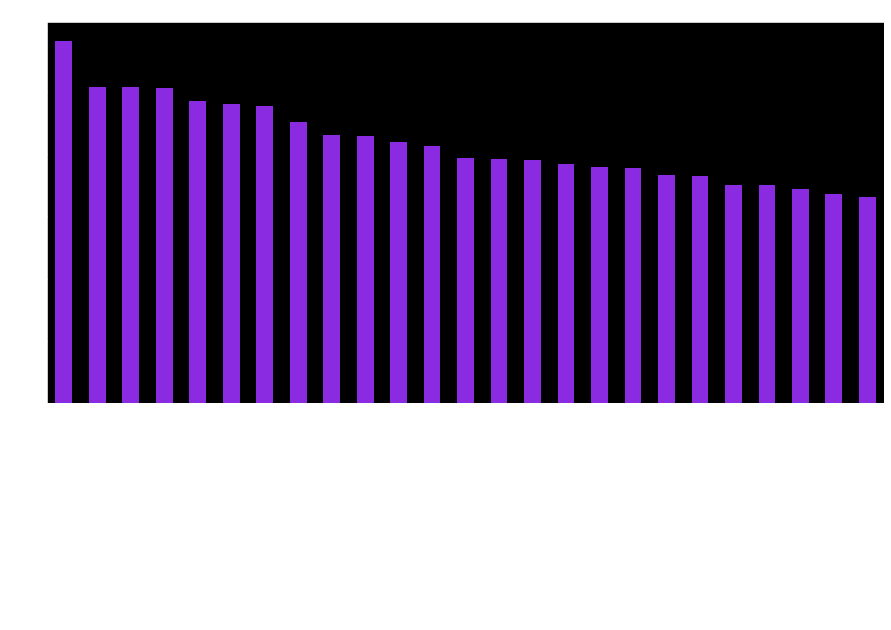

In [ ]:
plt.figure(figsize=(15 ,7))
most_rated=movielens.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.plot(kind="bar",title="Top 25 rated movies",ylabel="Count", xlabel="", color='#8A2BE2')

As we can see that the mean through size of 1 is 5.0 thus if one person rated it as 5 it would consider and give us a rating of 5.0

To avoid inaccuracy of top rating we would set parameter size as 100.

In [ ]:
movie_stat = movielens.groupby('title').agg({'rating':[np.size,np.mean]})
movie_stat.sort_values([('rating','mean')],ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

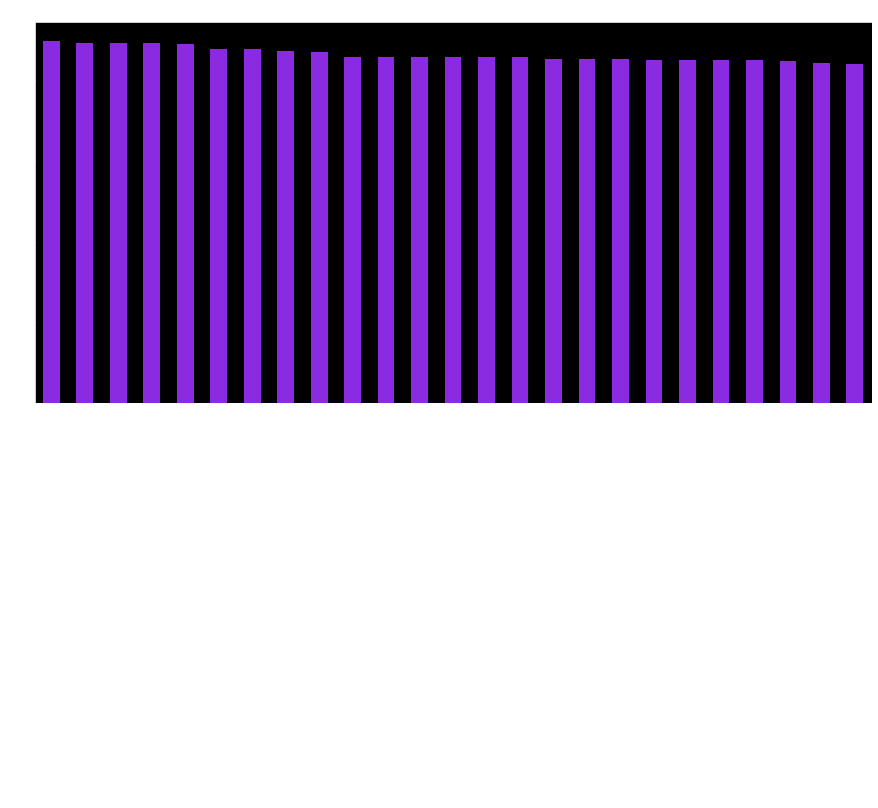

In [ ]:
plt.figure(figsize=(15 ,7))
most100=movie_stat['rating']['size'] >= 100
most_rated_mean=movie_stat[most100].sort_values([('rating', 'mean')], ascending=False)
most_rated_mean['rating']['mean'].sort_values(ascending=False)[:25].plot(kind="bar",title="Top 25 rated movies",ylabel="Rating", xlabel="", color='#8A2BE2')

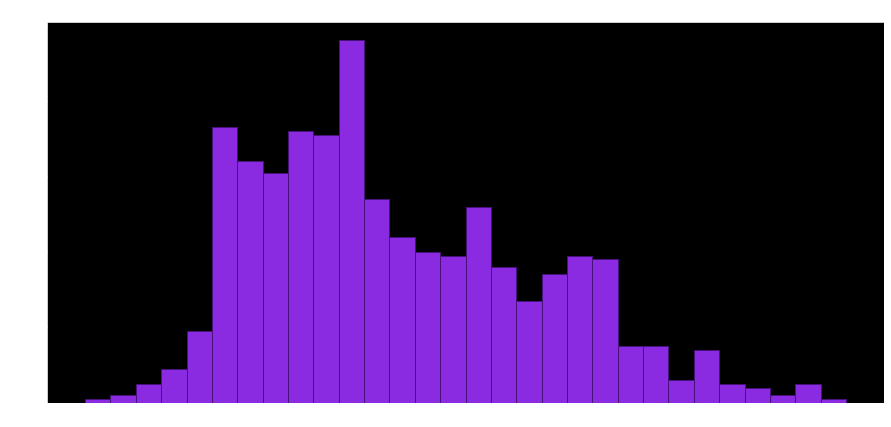

In [ ]:
plt.figure(figsize=(15 ,7))
# plt.xlabel=("Age")
# plt.ylabel=("count")
plt.title=("Age distribution")
users.age.plot.hist(bins=30,edgecolor='#49117C',color="#8A2BE2", title="No. Ratings w.r.t. Age")


## Insights of The Toy Story

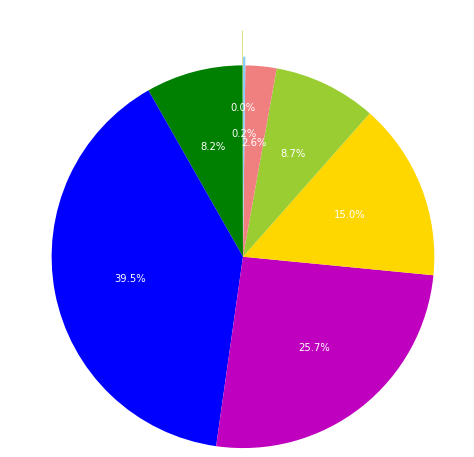

In [ ]:
labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
movielens['age_group'] = pd.cut(movielens.age, range(0, 81, 10), right=False, labels=labels)
distage=movielens.groupby('age_group').agg({'rating':[np.size,np.mean]})
colors=["y","g","b","m",'gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(distage['rating']['size'],startangle=90,labels=labels,colors=colors,explode=(0.4,0,0,0,0,0,0,0.1),autopct = '%1.1f%%',radius=2.2)
plt.show()

In [ ]:
toystory=movielens[movielens.movie_id==1]
toystory.shape
mov1 = movielens.sort_values("movie_id",ascending=True).head(452) ##we have 452 reviews approximately for Toystory
mov1.set_index('movie_id',inplace=True)
by_age = mov1.loc[mov1.index].groupby(['title', 'age_group']).agg([np.size,np.mean])
by_age

user_id              ... video_release_date     
                               size        mean  ...               size mean
title            age_group                       ...                        
Toy Story (1995) 0-9            NaN         NaN  ...                NaN  NaN
                 10-19      16724.0  510.729730  ...            16724.0  NaN
                 20-29      85428.0  508.132275  ...            85428.0  NaN
                 30-39      54692.0  464.487603  ...            54692.0  NaN
                 40-49      31640.0  433.028571  ...            31640.0  NaN
                 50-59      13108.0  380.482759  ...            13108.0  NaN
                 60-69       2260.0  471.800000  ...             2260.0  NaN
                 70-79        452.0  767.000000  ...              452.0  NaN

[8 rows x 10 columns]

As we could see below age 70-79 gave higher ratings for toystory

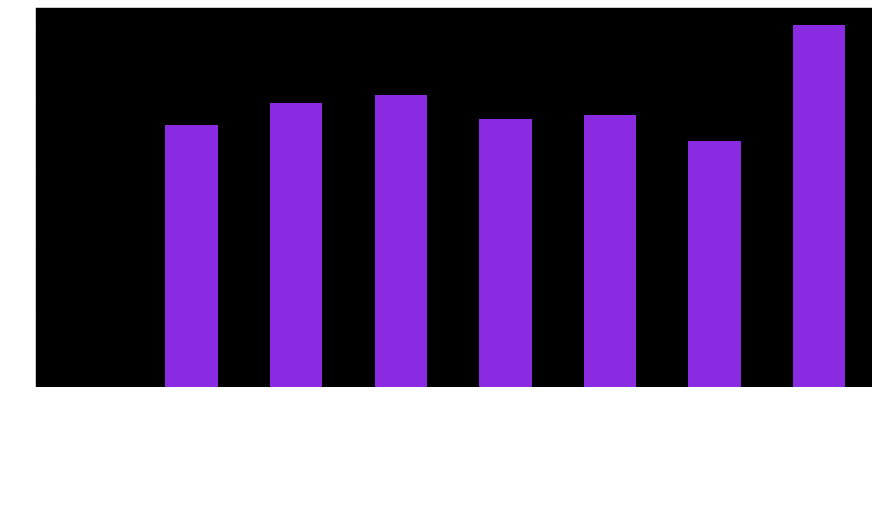

In [ ]:
plt.figure(figsize=(15 ,7))
by_age['rating']['mean'].plot(kind="bar",ylabel="Rating", xlabel="", color='#8A2BE2')


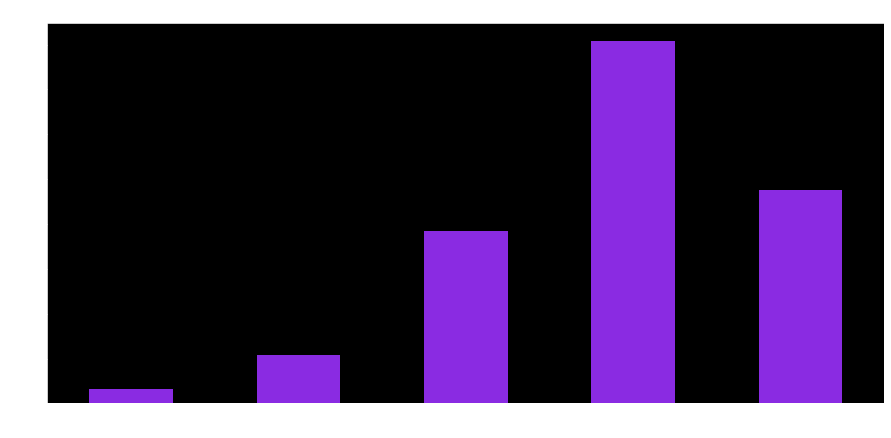

In [ ]:
plt.figure(figsize=(15 ,7))
# toystory=toystory.groupby('rating').agg([np.size,np.mean])
toystory['user_id']['size'].plot(kind="bar",title="By Rating of Toy story", ylabel="Count", xlabel="Rating", color='#8A2BE2')

## Comparision Based on Audience Gender

In [ ]:
pivoted = movielens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [ ]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [ ]:
pivoted.reset_index('movie_id', inplace=True)

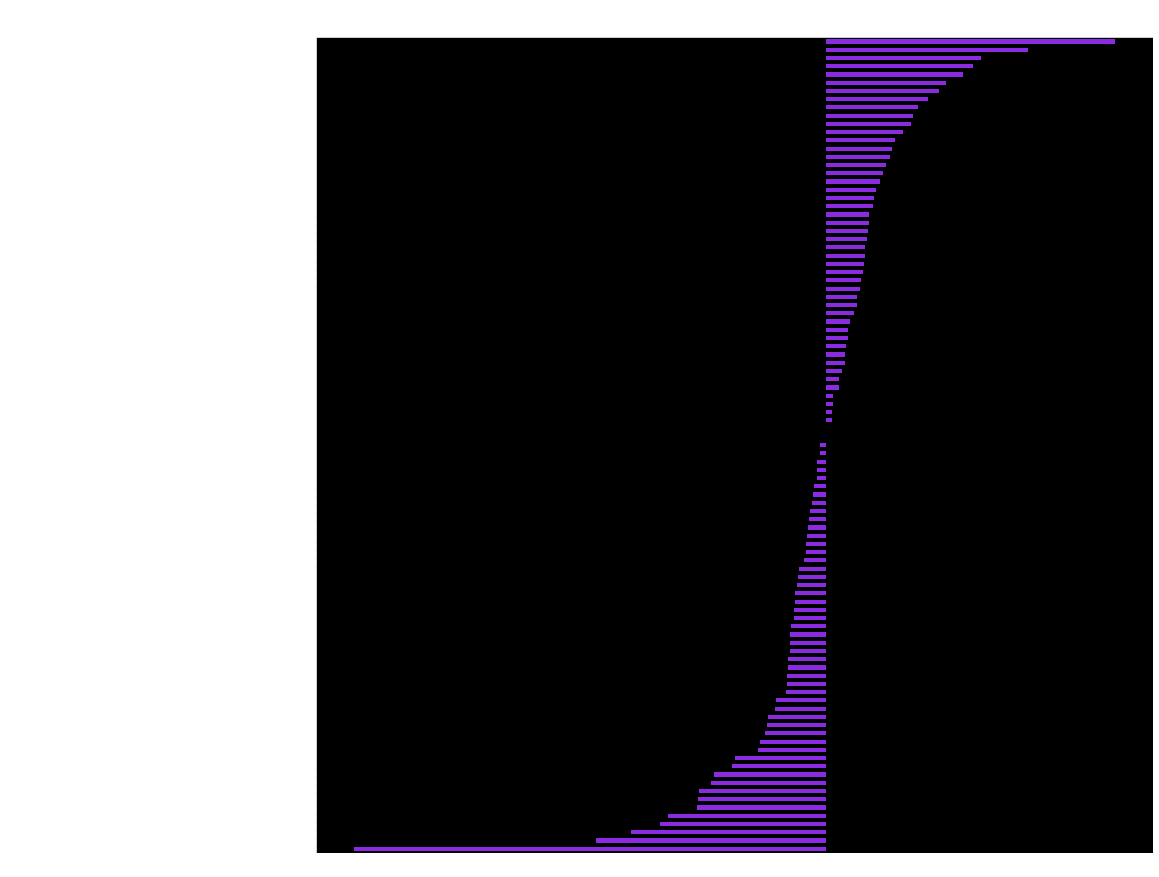

In [ ]:
disagreements = pivoted[pivoted.movie_id.isin(movielens.head(100).index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[15, 15],title=("Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)"), color='#8A2BE2')

#**BUILDING A RECOMMENDATION SYSTEM**

---



In [ ]:
mlmovie=movielens.drop(['user_id','zip_code'],axis=1)
mlmovie=mlmovie.drop(['sex','timestamp','title','release_date','video_release_date','imdb_url','age_group'],axis=1)
mlmovie.head()

,age,occupation,movie_id,rating
0,24,technician,61,4
1,47,educator,61,4
2,35,other,61,4
3,27,programmer,61,5
4,49,educator,61,4


In [ ]:
mlmovie=mlmovie[:500]
tgt = mlmovie[['rating']]
print(tgt.shape)
others=mlmovie[['movie_id','age','occupation']]
print(others.shape)
##converting the occupation into digits for linear regression , here we are going to make the machine predict ratings in accordance to 
##movie_id , age
others["occupation"]=others.occupation.replace(['technician', 'educator', 'other', 'programmer', 'healthcare',
       'student', 'artist', 'scientist', 'writer', 'engineer',
       'administrator', 'doctor', 'retired', 'librarian', 'entertainment',
       'executive', 'lawyer', 'none', 'marketing', 'salesman'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

others.head()


(500, 1)
(500, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,movie_id,age,occupation
0,61,24,1
1,61,47,2
2,61,35,3
3,61,27,4
4,61,49,2


##Using Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
for i in range(4):
    print(((train_test_split(others,tgt,random_state=1))[i]).shape)
    
x_train,x_test,y_train,y_test=train_test_split(others,tgt,random_state=1)


(375, 3)
(125, 3)
(375, 1)
(125, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lreg.get_params())
print(lreg.coef_)
print(lreg.intercept_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
[[ 0.00207221 -0.00373644 -0.02078028]]
[3.73071206]


In [ ]:
y_pred=lreg.predict(x_test)
y_pred[:15]

array([[3.48424982],
       [3.58021862],
       [3.65023341],
       [3.73802451],
       [3.79787227],
       [3.91344273],
       [3.55825971],
       [3.68478082],
       [3.86659136],
       [3.80082508],
       [3.53630081],
       [3.29755119],
       [3.93835445],
       [3.72307875],
       [3.38408485]])

In [ ]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.0449181233597307


In [ ]:
print(metrics.r2_score(y_test,y_pred))

0.004306236388885942


##Recomendation model using machine learning

In [ ]:
movies_df = pd.read_csv(root_path+'/IMDB-Dataset/movies.csv')
movie_df=movies_df

In [ ]:
movies_df = pd.concat([movies_df, movies_df.genres.str.get_dummies(sep='|')], axis=1)  
movies_df.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Using Collabrative Filtering

In [ ]:
movies_cateogary = movies_df.columns[3:]
movies_df.loc[0]

movieId                                                         1
title                                            Toy Story (1995)
genres                Adventure|Animation|Children|Comedy|Fantasy
(no genres listed)                                              0
Action                                                          0
Adventure                                                       1
Animation                                                       1
Children                                                        1
Comedy                                                          1
Crime                                                           0
Documentary                                                     0
Drama                                                           0
Fantasy                                                         1
Film-Noir                                                       0
Horror                                                          0
IMAX      

##Manually using preferences for some user

In [ ]:
from collections import OrderedDict
user_preferences = OrderedDict(zip(movies_cateogary, []))

user_preferences['Action'] = 5  
user_preferences['Adventure'] = 5  
user_preferences['Animation'] = 1  
user_preferences["Children's"] = 2  
user_preferences["Comedy"] = 3  
user_preferences['Crime'] = 2  
user_preferences['Documentary'] = 1  
user_preferences['Drama'] = 1  
user_preferences['Fantasy'] = 1  
user_preferences['Film-Noir'] = 1  
user_preferences['Horror'] = 2  
user_preferences['Musical'] = 1  
user_preferences['Mystery'] = 3  
user_preferences['Romance'] = 1  
user_preferences['Sci-Fi'] = 5  
user_preferences['War'] = 3  
user_preferences['Thriller'] = 2  
user_preferences['Western'] =1 

In [ ]:
def dot_product(vector1,vector2):
    return sum([ i*j for i,j in zip(vector1, vector2)])

In [ ]:
def movie_score(movie_features,user_preferences):
    return dot_product(movie_features, user_preferences)

In [ ]:
toy_Story_features=movies_df.loc[0][3:]
toy_Story_features

(no genres listed)    0
Action                0
Adventure             1
Animation             1
Children              1
Comedy                1
Crime                 0
Documentary           0
Drama                 0
Fantasy               1
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
Name: 0, dtype: object

In [ ]:
toy_story_user_predicted_score = dot_product(toy_Story_features, user_preferences.values())  
toy_story_user_predicted_score

9

In [ ]:
movies_df[movies_df.title.str.contains('Eternal Sunshine')]

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5328,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0


In [ ]:
eternal=movies_df.loc[5127][3:]
eternal

(no genres listed)    0
Action                1
Adventure             1
Animation             0
Children              0
Comedy                1
Crime                 1
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
Name: 5127, dtype: object

In [ ]:
eternal_user_predicted_score = dot_product(eternal, user_preferences.values())  
eternal_user_predicted_score 

9

##We get the top 10 recommended movies

In [ ]:
def get_movie_recommendations(user_preferences, n_recommendations):  
    #we add a column to the movies_df dataset with the calculated score for each movie for the given user
    movies_df['score'] = movies_df[movies_cateogary].apply(movie_score, 
                                                           args=([user_preferences.values()]), axis=1)
    return movies_df.sort_values(by=['score'], ascending=False)['title'][:n_recommendations]

get_movie_recommendations(user_preferences, 10)  

8492    Lupin III: First Contact (Rupan Sansei: Faasut...
8469    Lupin III: Sweet Lost Night (Rupan Sansei: Swe...
6220    Patlabor: The Movie (Kidô keisatsu patorebâ: T...
8736                                        Rubber (2010)
8629                                     Inception (2010)
7348    Aqua Teen Hunger Force Colon Movie Film for Th...
8910                               Mars Needs Moms (2011)
7797                                      Watchmen (2009)
8760                                      Megamind (2010)
9012                               Kung Fu Panda 2 (2011)
Name: title, dtype: object